### Initialize the environment

In [89]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [91]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [92]:
run=3
date_time='2017-02-20_2143' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [93]:
config

{u'dbns': {u'GE': {u'batchSize': 5,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 5,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 5,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 0.5,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 5,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'b669e

### Load the dataset and visualize the input of the pathways

In [94]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [95]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

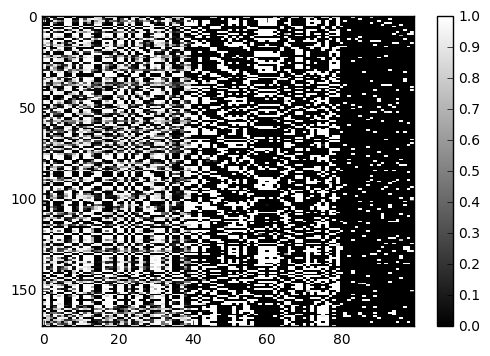

In [96]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [97]:
joint_layer[1:10,1:10]

array([[  2.85278220e-04,   9.93984282e-01,   1.98637664e-01,
          1.83975305e-02,   1.40818569e-03,   9.99960482e-01,
          9.98790860e-01,   4.89861844e-03,   5.61779030e-02],
       [  4.12399620e-02,   8.23710039e-02,   8.93245697e-01,
          5.50263584e-01,   3.30135167e-01,   9.53442633e-01,
          9.68041182e-01,   1.98167443e-01,   1.61616206e-01],
       [  2.05491669e-03,   9.81952608e-01,   3.17937404e-01,
          2.22103447e-02,   4.28451672e-02,   9.98308420e-01,
          9.70550001e-01,   2.90361661e-02,   7.53592374e-03],
       [  5.03803221e-07,   9.99203503e-01,   4.71191219e-04,
          3.95163224e-04,   2.89875788e-05,   1.00000000e+00,
          9.99962270e-01,   6.18381964e-05,   7.68469818e-06],
       [  9.96611714e-01,   9.27347504e-03,   9.98834252e-01,
          9.63437200e-01,   9.11355793e-01,   7.64376135e-04,
          2.78396487e-01,   9.72890794e-01,   9.99334872e-01],
       [  1.69777248e-09,   9.99782741e-01,   7.26634730e-03,
   

### Check the weights distributions

([array([  0.00000000e+00,   3.00000000e+00,   1.97000000e+02,
           2.39800000e+03,   7.34700000e+03,   7.43200000e+03,
           2.34300000e+03,   2.13000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.60000000e+01,   5.20000000e+02,
           3.43100000e+03,   7.69200000e+03,   6.00400000e+03,
           1.98000000e+03,   2.87000000e+02,   7.00000000e+00,
           0.00000000e+00]),
  array([    0.,    27.,   552.,  3680.,  7474.,  5781.,  2093.,   320.,
            10.,     0.]),
  array([    0.,    12.,   272.,  2021.,  6240.,  7743.,  3239.,   402.,
             8.,     0.]),
  array([    0.,    34.,   715.,  4497.,  8244.,  5075.,  1273.,    99.,
             0.,     0.]),
  array([  0.00000000e+00,   3.50000000e+01,   6.94000000e+02,
           4.14000000e+03,   7.95600000e+03,   5.39600000e+03,
           1.55400000e+03,   1.56000000e+02,   6.00000000e+00,
           0.00000000e+00]),
  array([  2.00000000e+00,   2.10000000e+01,  

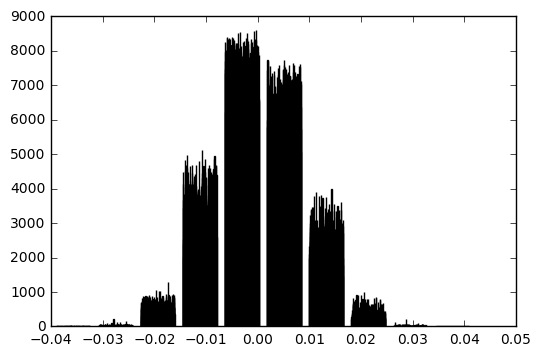

In [98]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x14b1e5210>,
 <a list of 3 Text xticklabel objects>)

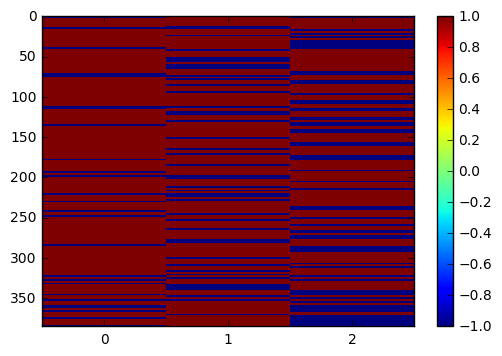

In [99]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x15d6d30d0>,
 <a list of 3 Text xticklabel objects>)

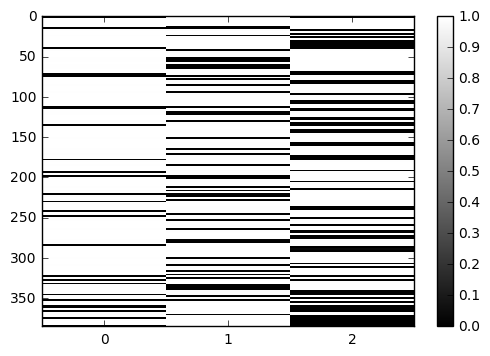

In [100]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([  26.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  144.]),
  array([  45.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  125.]),
  array([  62.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  108.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 3 Lists of Patches objects>)

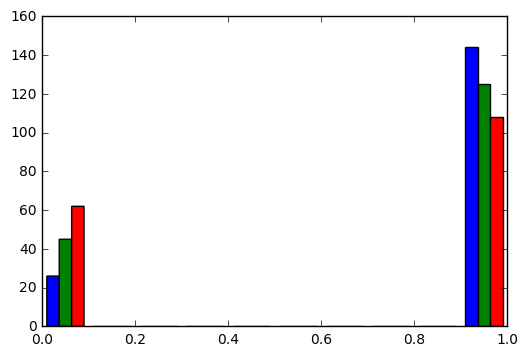

In [101]:
plt.hist(top_output)

In [102]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [103]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([  6.,  14.,   6.,  39.,  48.,  57.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Patch objects>)

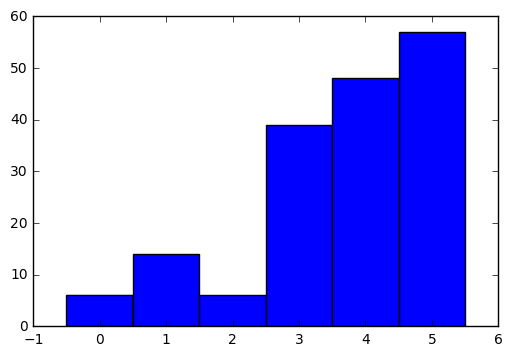

In [104]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [105]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [106]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [107]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


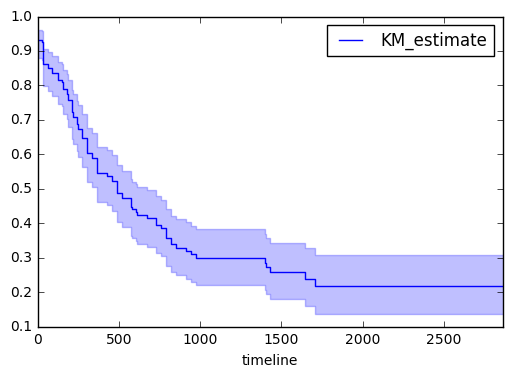

In [108]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

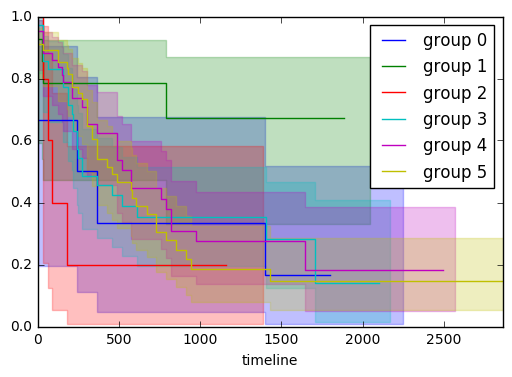

In [110]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,2,3,4,5]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)